In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.outliers_influence as sms
from statsmodels.tools.tools import add_constant

from patsy.contrasts import ContrastMatrix
from patsy.contrasts import Poly
%matplotlib inline

In [64]:
data = pd.read_csv('Teach.csv')

In [69]:
data

,group,exam,nothing,reward
0,1,50,0,0
1,1,45,0,0
2,1,48,0,0
3,1,47,0,0
4,1,45,0,0
5,1,49,0,0
6,1,50,0,0
7,1,54,0,0
8,1,57,0,0
9,1,55,0,0


In [66]:
dummies = pd.get_dummies(data['group'])
dummy = dummies.iloc[:, 1:]
dummy.columns  =['nothing', 'reward']
dummy.head()

,nothing,reward
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [67]:
data = pd.merge(data, dummy, how='inner', right_index=True, left_index=True)

In [68]:
m01 = ols('exam~C(group)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   exam   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     21.01
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           3.15e-06
Time:                        20:11:06   Log-Likelihood:                -91.332
No. Observations:                  30   AIC:                             188.7
Df Residuals:                      27   BIC:                             192.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.0000      1.694     29.524      0.000      46.525      53.475
C(group)[T.2]     6.0000      2.395      2.505      0.019       1.086      10.914
C(group)[T.3]    15.4000      2.395      6.430      0.000      10.486      20.314
==============================================================================
Omnibus:                        0.671   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.746
Skew:                           0.218   Prob(JB):                        0.689
Kurtosis:                       2.363   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Checking various assumptions before doing Anova**

In [71]:
data_1 = data[data['group']==1]
data_2 = data[data['group']==2]
data_3 = data[data['group']==3]

In [72]:
stat, p = st.levene(data_1['exam'], data_2['exam'], data_3['exam'])
print(stat, p)

1.734265734265734 0.1956209045688294


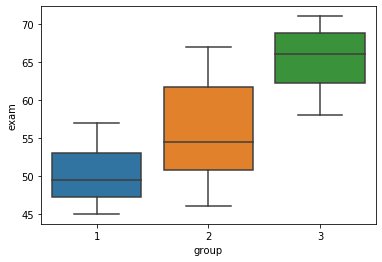

In [73]:
_ = sns.boxplot(x='group', y='exam', data=data)

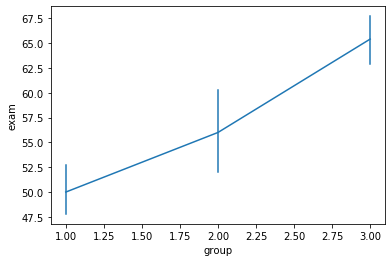

In [75]:
_ = sns.lineplot(x='group', y='exam',data=data, err_style='bars')

In [76]:
anova_table = sm.stats.anova_lm(m01)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,1205.066667,602.533333,21.007748,0.000003
Residual,27.0,774.400000,28.681481,NaN,NaN


In [77]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction.head()

,predicted
0,50.0
1,50.0
2,50.0
3,50.0
4,50.0


In [78]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [79]:
summary_frame = sms.OLSInfluence(m01).summary_frame()

In [80]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

In [81]:
summary_frame .head()

,dfb_Intercept,dfb_C(group)[T.2],dfb_C(group)[T.3],cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits,predicted,standarized_prediction
0,4.117126e-15,-7.278120e-15,-1.455624e-15,7.243902e-32,1.398518e-15,0.1,4.661728e-16,1.372375e-15,4.574585e-16,50.0,-1.106588
1,-3.278413e-01,2.318188e-01,2.318188e-01,3.587006e-02,-9.841198e-01,0.1,-3.280399e-01,-9.835240e-01,-3.278413e-01,50.0,-1.106588
2,-1.291342e-01,9.131168e-02,9.131168e-02,5.739210e-03,-3.936479e-01,0.1,-1.312160e-01,-3.874026e-01,-1.291342e-01,50.0,-1.106588
3,-1.944039e-01,1.374643e-01,1.374643e-01,1.291322e-02,-5.904719e-01,0.1,-1.968240e-01,-5.832118e-01,-1.944039e-01,50.0,-1.106588
4,-3.278413e-01,2.318188e-01,2.318188e-01,3.587006e-02,-9.841198e-01,0.1,-3.280399e-01,-9.835240e-01,-3.278413e-01,50.0,-1.106588


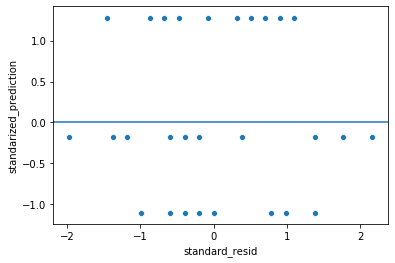

In [82]:
_ = sns.scatterplot(x = 'standard_resid', y='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

In [83]:
st.shapiro(data['exam'])

(0.9368069767951965, 0.07463926076889038)

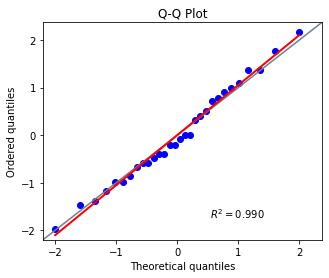

In [84]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

#### **From levene test and residual plot it is evident that homogeneity of variance is followed**
#### **From shapiro-wilk test and qq plot it is evident that assumption of Normality too  is followed**

## **Planned Comparisons**

### **Hypothesis to test**

#### Carry out a one-way ANOVA and use planned comparisons to test the hypotheses that: (1) reward results in better exam results than either punishment or indifference; and (2) indifference will lead to significantly better exam results than punishment.

In [85]:
contrast1 = [1,1,-2]
contrast2 = [-1,1,0]

In [86]:
contrast = np.vstack((contrast1, contrast2))

In [87]:
contrast = contrast.T

In [88]:
print(contrast)

[[ 1 -1]
 [ 1  1]
 [-2  0]]


In [90]:
m02 = ols('exam~C(group, contrast)', data=data).fit()
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   exam   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     21.01
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           3.15e-06
Time:                        20:12:26   Log-Likelihood:                -91.332
No. Observations:                  30   AIC:                             188.7
Df Residuals:                      27   BIC:                             192.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      57.1333      0.978     58.432      0.000      55.127      59.140
C(group, contrast)[custom0]    -4.1333      0.691     -5.978      0.000      -5.552      -2.715
C(group, contrast)[custom1]     3.0000      1.198      2.505      0.019       0.543       5.457
==============================================================================
Omnibus:                        0.671   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.746
Skew:                           0.218   Prob(JB):                        0.689
Kurtosis:                       2.363   Cond. No.                         1.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Trend Analysis**

#### The  output  above shows the significance of the  two  contrasts  specified.  The t-test  for  the first contrast tells us that reward was significantly different from punishment and indifference (it’s  significantly  different  because  the  value  in  the  column  labelled Pr(>|t|) is less than .05). Looking at the means, this tells us that the average mark after reward was significantly higher than  the  average  mark  for  punishment  and  indifference  combined.  The  second  contrast (together  with the  descriptive  statistics)  tells  us  that  the  marks  after  punishment  were significantly lower than after indifference (again, it’s significantly different because the value in the  column  labelled Pr(>|t|). is less than .05). As such  we  could  conclude  that  reward produces  significantly  better  exam  grades  than  punishment  and  indifference,  and  that punishment  produces  significantly  worse  exam  marks  than  indifference.  So  lecturers  should reward their students, not punish them!

In [91]:
mod_poly = ols("exam~ C(group, Poly)", data=data)
res_poly = mod_poly.fit()
print(res_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   exam   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     21.01
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           3.15e-06
Time:                        20:12:48   Log-Likelihood:                -91.332
No. Observations:                  30   AIC:                             188.7
Df Residuals:                      27   BIC:                             192.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### **Calculating the effect size**

In [92]:
SSm = 1205.06
SSr = 774.4
SSt = SSm+SSr

In [93]:
MSm = 602.53
MSr = 28.68

In [96]:
ω_squared = (SSm-2*MSr)/(SSt+MSr)   # here ω_squared is like adjusted R_squared
ω_squared

0.5715238977362136

In [98]:
ω = np.sqrt(ω_squared)       # ω, more accurate measure of R
ω

0.7559919958149118

### **Effect size of contrasts**

In [99]:
def r_contrast(t,df):
    return np.sqrt(t**2/(t**2+df))

In [100]:
dof = 30-2-1   # N-p-1 for normal regression , p is the number of predictors (in this case 2, the two contrast variables
print(r_contrast(-5.978, dof))

0.7547373158252559


In [101]:
dof = 30-2-1   # N-p-1 for normal regression , p is the number of predictors (in this case 2, the two contrast variables
print(r_contrast(2.505, dof))

0.43425870706029884


#### If  you  think  back  to  our  benchmarks  for  effect  sizes  this  represents  a  huge  effect  (it  is  well above .5, the threshold for a large effect). Therefore, as well as being statistically significant, this effect is large and so represents a substantive finding. contrast2 too is a substantive finding and represents a medium to large effect size

### **Interpreting and writing the result**
#### The correct way to report the main finding would be:All significant values are reported at p < .05.There was a significant effect of teaching style  on  exam  marks, F(2,  27)  =  21.01, ω2 = .57.  Planned  contrasts  revealed  that reward produced significantly better exam grades than punishment and indifference,t(27) = –5.98, r = .75, and that punishment produced significantly worse exam marks than indifference, t(27) = 2.51, r = .43. 